In [4]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plot

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import warnings
warnings.filterwarnings('ignore')
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [7]:
import keras
import numpy as np
import matplotlib 
from matplotlib import pyplot as plot
from keras.utils import np_utils

In [8]:
from keras.datasets import mnist

In [9]:
import keras
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
#  to split the data of training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
from keras.models import Sequential 
from keras.layers import Activation, Dense, Flatten 

In [11]:
model = Sequential()

In [12]:
model.add(Dense(512, input_shape=(784,)))

In [13]:
model.add(Activation('relu'))

In [14]:
model.add(Dropout(0.2))

In [15]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [16]:
model.add(Dense(10))

In [17]:
model.add(Activation('softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('loaded data')

loaded data


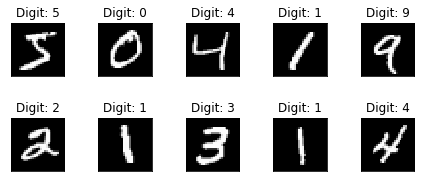

In [20]:
for i in range(10):
    plot.subplot(3,5,i+1)
    plot.tight_layout()
    plot.imshow(X_train[i], cmap='gray', interpolation='none')
    plot.title("Digit: {}".format(y_train[i]))
    plot.xticks([])
    plot.yticks([])

In [21]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Text(0.5, 1.0, 'Digit: 5')

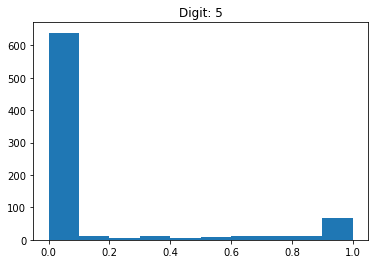

In [23]:
plot.hist(X_train[0])
plot.title("Digit: {}".format(y_train[0]))

Text(0.5, 1.0, 'Digit: 0')

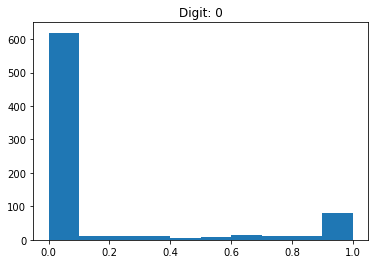

In [24]:
plot.hist(X_train[1])
plot.title("Digit: {}".format(y_train[1]))

Text(0.5, 1.0, 'Digit: 4')

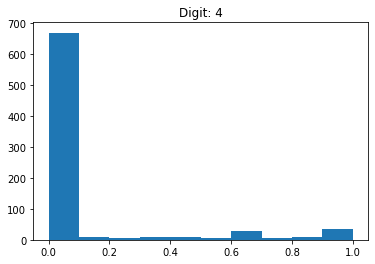

In [25]:
plot.hist(X_train[2])
plot.title("Digit: {}".format(y_train[2]))

In [26]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [28]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)

In [29]:
for i in range(5):
   print (Y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [30]:
Y_test = np_utils.to_categorical(y_test, n_classes)

In [31]:
history = model.fit(X_train, Y_train,
   batch_size=128, epochs=20,
   verbose=2,
   validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 10s - loss: 0.2491 - accuracy: 0.9253 - val_loss: 0.1094 - val_accuracy: 0.9655 - 10s/epoch - 22ms/step
Epoch 2/20
469/469 - 8s - loss: 0.1022 - accuracy: 0.9689 - val_loss: 0.0945 - val_accuracy: 0.9705 - 8s/epoch - 18ms/step
Epoch 3/20
469/469 - 8s - loss: 0.0693 - accuracy: 0.9785 - val_loss: 0.0713 - val_accuracy: 0.9767 - 8s/epoch - 16ms/step
Epoch 4/20
469/469 - 8s - loss: 0.0561 - accuracy: 0.9820 - val_loss: 0.0640 - val_accuracy: 0.9795 - 8s/epoch - 16ms/step
Epoch 5/20
469/469 - 8s - loss: 0.0450 - accuracy: 0.9855 - val_loss: 0.0664 - val_accuracy: 0.9808 - 8s/epoch - 16ms/step
Epoch 6/20
469/469 - 7s - loss: 0.0380 - accuracy: 0.9873 - val_loss: 0.0657 - val_accuracy: 0.9804 - 7s/epoch - 16ms/step
Epoch 7/20
469/469 - 7s - loss: 0.0332 - accuracy: 0.9890 - val_loss: 0.0692 - val_accuracy: 0.9808 - 7s/epoch - 16ms/step
Epoch 8/20
469/469 - 8s - loss: 0.0306 - accuracy: 0.9898 - val_loss: 0.0679 - val_accuracy: 0.9804 - 8s/epoch - 16ms/step
Epoch 9/20
469

In [32]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)


313/313 - 2s - loss: 0.0785 - accuracy: 0.9839 - 2s/epoch - 6ms/step


In [33]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 2s - loss: 0.0785 - accuracy: 0.9839 - 2s/epoch - 6ms/step


In [34]:
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])


Test Loss 0.07846597582101822
Test Accuracy 0.9839000105857849


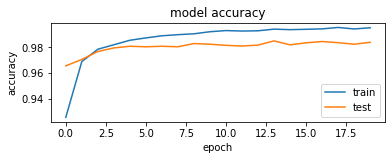

In [35]:
plot.subplot(2,1,1)
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')


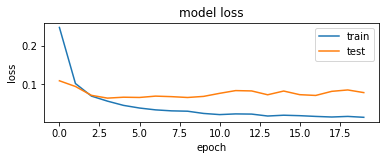

In [36]:
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

In [38]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

313/313 [==============================] - 2s 6ms/step


In [39]:
from tensorflow import keras
print(keras.__version__)

2.10.0


In [40]:
correct_predictions = np.nonzero(predictions == y_test)[0]
incorrect_predictions = np.nonzero(predictions != y_test)[0]

In [41]:
print(len(correct_predictions)," classified correctly")
print(len(incorrect_predictions)," classified incorrectly")

0  classified correctly
1  classified incorrectly
